# Hands-on 1: Clustering

Clustering technics are a particular class of unsupervised Machine Learning, whose objective is to separate your data into homogeneous groups with common characteristics. With those, one can find groups of similar objects, objects that are more related to each other than to objects in other groups. Examples of business-oriented applications of clustering include the grouping of music, news, movies, or even people, finding customers that share similar interests based on common behaviors/interests as a basis for recommendation engines.

The following four types are the most widely used types of clustering models.

* **Centroid Models**: uses the distance between a data point and the centroid of the cluster to group data. K-means clustering is an example of a centroid model.
* **Distribution Models**: segments data based on their probability of belonging to the same distribution. Gaussian Mixture Model (GMM) is a popular distribution model.
* **Connectivity Models**: uses the closeness of the data points to decide the clusters. Hierarchical Clustering Model is a widely used connectivity model.
* **Density Models**: scans the data space and assigns clusters based on the density of data points. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density model.

[More Information here](https://scikit-learn.org/stable/modules/clustering.html).





---


## K-means

The K-means algorithm is a very well known unsupervised algorithm in clustering. In this lab practice we will detail how it works and the useful ways to optimize it.

The basic question is how do we measure similarity between objects? We can define similarity as the opposite of diference, and a commonly used metric for diference between exemples for clustering samples with continuous features is the squared Euclidean distance between two points x and y in m-dimensional space:
$$
d^2(\mathbf{x},\mathbf{y}) = \sum_{j=1}^m(x_j-y_j)^2 = \Vert \mathbf{x}-\mathbf{y}\Vert^2_2  
$$

Based on this Euclidean distance metric, we can describe the k-means algorithm (one of the most basic clustering technics) as a optimization problem for minimizing the within-cluster Sum of Squared Errors (SSE, also called cluster inertia or distortion), defined as follows:

$$
\mathrm{SSE} = \sum_{i=1}^n \sum_{j=1}^k w^{(i,j)} d^2(\mathbf{x}^{(i)},\mu^{(j)})
$$

where $n$ is the number of samples, $k$ is the number of clusters, $\mu^{(j)}$ is the centroid of the $j$-th cluster, $\mathbf{x}^{(i)}$ is on the $j$-th cluster if $\mu^{(j)}$ is tha closest centroid to it, and $w^{(i,j)}=1$ if $\mathbf{x}^{(i)}$ is in cluster $j$ and $0$ otherwise.

*For information:* This algorithm was designed in 1957 at Bell Laboratories by Stuart P. Lloyd as a pulse code modulation (PCM) technique. It was presented to the general public only in 1982. In 1965 Edward W. Forgy had already published an almost similar algorithm, which is why K-means is often called the Lloyd-Forgy algorithm. The fields of application are diverse: customer segmentation, data analysis, image segmentation, semi-supervised learning etc.

### The principle of the k-means algorithm

Given a set of points and an integer $k$, the algorithm aims to divide the points into $k$ homogeneous and compact groups, called clusters. Let's look at the example below:

In [ ]:
#Just the basics
import numpy as np
import pandas as pd

# Plotting te things
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
mpl.rc('image', cmap='jet')

# Mathematical Analysis
from scipy import linalg
from scipy.spatial import Voronoi, voronoi_plot_2d

# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestCentroid

# Dataset
from sklearn import datasets
from sklearn.datasets import make_blobs

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN


1. Let's create a dataset of size $N=2000$, distributed in three clusters with a Gaussian distribution,

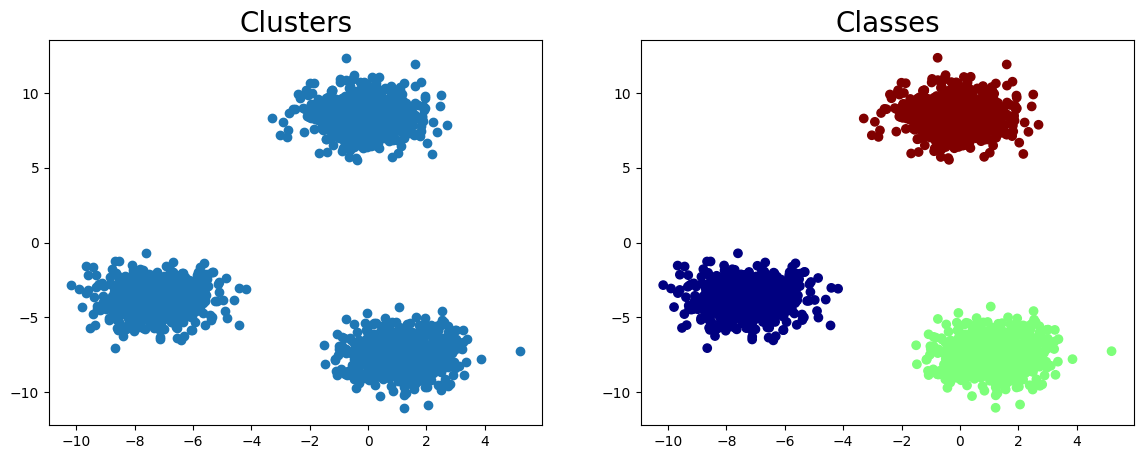

In [ ]:
n_samples = 2000
random_state = 130 # fix the random state for reproducibility
n_components=3
std_dev=1.0
# This function makes some clusters with 2D coordinates in X and a label y
# Usefull for testing unsupervised ML as well classification

X,y = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=std_dev, random_state=random_state)

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1.scatter(X[:,0], X[:,1])
ax1.set_title ('Clusters',fontsize=20)
ax2.scatter(X[:,0], X[:,1], c = y)
ax2.set_title ('Classes',fontsize=20)
xlim, ylim = ax1.get_xlim(),ax1.get_ylim()

2. Create a model with $k=3$. As we set `n_components=3` while generating the data, this should be a good guess on how many clusters are in our data.

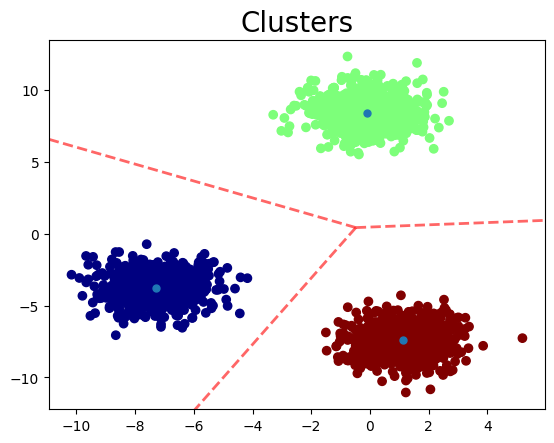

In [ ]:
# Fix the number of clusters that you want
nb_c = 3

# create a K-means model with that number of clusters
model = KMeans(n_clusters=nb_c
               , init='random'
               , n_init=10
               , max_iter=300
               , tol=1e-04
               , random_state=random_state
              )

# cluster the data with that model
model.fit(X)

# here for the demonstration use the same data to see how it performs
# y_pred :labels assigned to each data points
# centers : centroid positions of each cluster

y_pred = model.predict(X)
centers = model.cluster_centers_
# Plot the data

vor = Voronoi(centers)
voronoi_plot_2d(vor
                , show_vertices=False
                , line_colors='red'
                , line_width=2
                , line_alpha=0.6
                , point_size=10)

plt.scatter(X[:, 0], X[:,1], c = y_pred)
plt.xlim(xlim)
plt.ylim(ylim)
plt.title ('Clusters',fontsize=20)
plt.show()

**Note**: The cluster labels can be different but this is not important, so seems to perform perfectly as can be seen from the initial 3 classes that have been built.

k-means divides the space using hyperplanes to attibute a data point to a cluster. For 2D data, these planes can visualized by a Voronoï analysis. This will be more clear when increasing the requested number of clusters bellow and can help predicting to which cluster a new data point should be attributed.

3. What if we change the wanted number of clusters ?

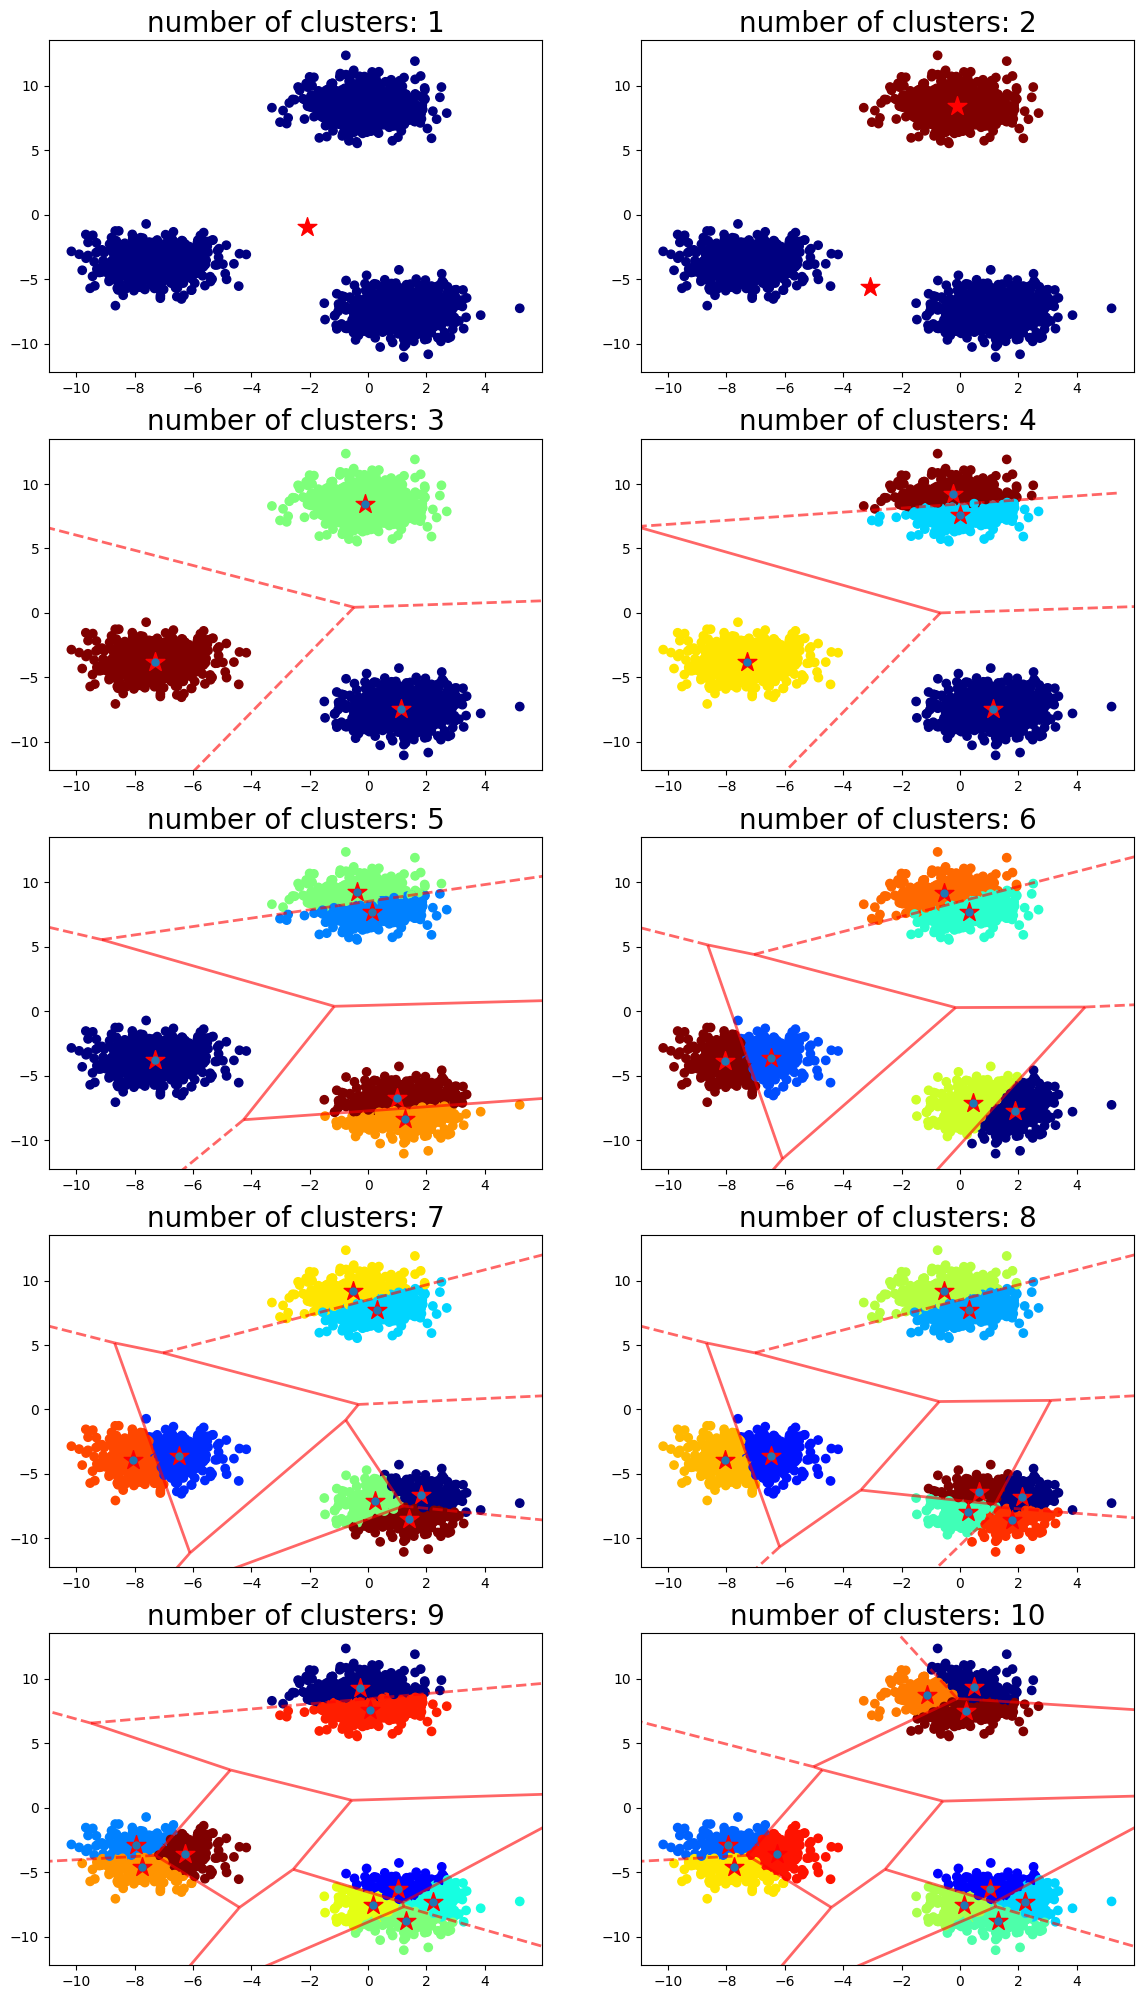

In [ ]:
# Fix the number of clusters that you want
y_pred = np.zeros(n_samples) #create an empty array
random_state = 1234
k_max = 10
nr = k_max//2

models = []

figure, ax = plt.subplots(nrows=nr, ncols = 2, figsize=(14,5*nr))

for nb_c in range(1,k_max+1):

# create a K-means model with that number of clusters
    model = KMeans(n_clusters=nb_c
               , init='random'
               , n_init=10
               , max_iter=300
               , tol=1e-04
               , random_state=random_state
              )
# cluster the data with that model
    model.fit(X)

# here for thedemonstration use the same data to see how it performs
    y_pred = np.append(y_pred, model.predict(X))
    models.append(model)

y_p = np.reshape(y_pred,(k_max+1,n_samples))

for nb_c in range(1,k_max+1):
    ax[(nb_c-1)//2,1-nb_c%2].scatter(X[:, 0], X[:,1], c = y_p[nb_c,:])
    ax[(nb_c-1)//2,1-nb_c%2].set_title(f'number of clusters: {nb_c}', fontsize = 20)
    ax[(nb_c-1)//2,1-nb_c%2].scatter(models[nb_c-1].cluster_centers_[:,0], models[nb_c-1].cluster_centers_[:,1],
                marker='*',
                color='red',
                s=200);

    if nb_c>2:
        vor = Voronoi(models[nb_c-1].cluster_centers_)
        voronoi_plot_2d(vor, ax[(nb_c-1)//2,1-nb_c%2]
            , show_vertices=False
            , line_colors='red'
            , line_width=2
            , line_alpha=0.6
            , point_size=10
            , point_alpha=0
            )
    ax[(nb_c-1)//2,1-nb_c%2].set_xlim(xlim)
    ax[(nb_c-1)//2,1-nb_c%2].set_ylim(ylim)


One can say that the partitionning is not ideal because the number of initial clusters is either lower or higher than the visual impression (except for $k=3$, the we know by construction as the real number of clusters). The fact is that in real data, we usualy dont know the number of clusters and maybe this number is not unique.

3. Search for the optimal number of clusters

If you dont have any intuition about your data or want to be sure while choosing, there are methods to help you determine the ideal number of clusters.

####  Elbow method
This method is based on the notion of inertia, the same one we defined above as SSE. For k-means, the inertia monotonicaly decreases with number of clusters (the inertia is reduced with $k$ cause the points will be next to their centroids). One can choose the value of $k$ as the one for what there is no more significant reduction on the inertia if the number of clusters in in creased.

Let's look at what this gives on our example:

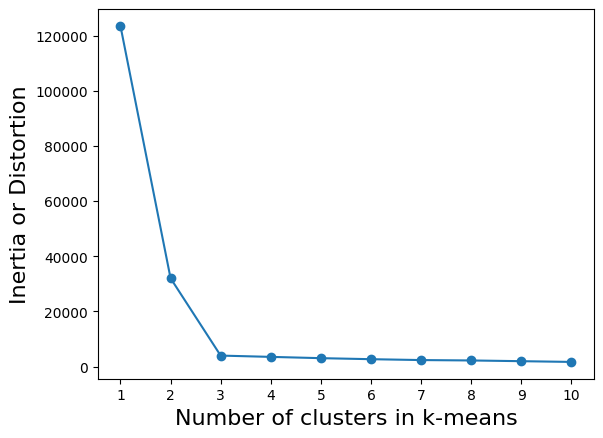

In [ ]:
# Extract the inertia

elb = []
for i in range(k_max):
    elb.append(models[i].inertia_)


plt.plot(range(1,k_max+1),elb, marker = 'o')
plt.xticks(range(1,k_max+1))
plt.xlabel('Number of clusters in k-means', fontsize=16)
plt.ylabel('Inertia or Distortion', fontsize=16)
plt.show()

One can notice that the inertia stagnates after 3 clusters. This method is conclusive here. Nevertheless it can be coupled with a more precise approach but which requires more computing time.

#### Silhouette coefficient

The silhouette coefficient is defined as

$$
s(\mathbf{x}^{(i)}) = \frac{b-a}{\max(a,b)},
$$

where $a$ is the average of the distances between the sample $\mathbf{x}^{(i)}$ to all other samples inside the same cluster (i.e., the intra-cluster average), and $b$ is the average distance from $\mathbf{x}^{(i)}$ to the samples in the nearest cluster. This coefficient can vary between $-1$ and $+1$. A $s$ coefficient close to $+1$ means that the observation is well located inside its own cluster, while a coefficient close to $0$ means that it is located near a border; finally, a coefficient close to $-1$ means that the observation is associated with the wrong cluster. To analyze the full set, the avarage $<s(\mathbf{x}^{(i)})>_i$ should be considered.

The calculation of this coefficient is included in the `sklearn.metrics` library. As for the inertia, lets display the evolution of the coefficient as a function of the number of clusters for our example:

For n_clusters = 2 The average silhouette_score is : 0.7151270054131913
For n_clusters = 3 The average silhouette_score is : 0.8303627254208252
For n_clusters = 4 The average silhouette_score is : 0.6468143818443098
For n_clusters = 5 The average silhouette_score is : 0.4833382588782614
For n_clusters = 6 The average silhouette_score is : 0.31373398899338784
For n_clusters = 7 The average silhouette_score is : 0.32035746099517975
For n_clusters = 8 The average silhouette_score is : 0.3189905364302927
For n_clusters = 9 The average silhouette_score is : 0.3218305969300876
For n_clusters = 10 The average silhouette_score is : 0.3242554112921916


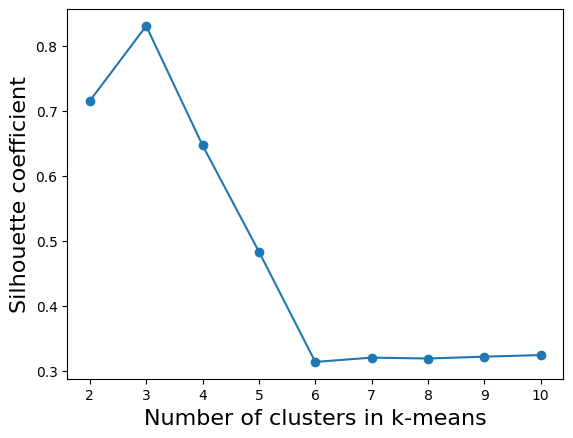

In [ ]:

# Extract the silhouette

sil = []
for i in range(2,k_max+1):
    sil.append(silhouette_score(X, y_p[i]))

    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        sil[-1],
    )
plt.plot(range(2,k_max+1),sil, marker = 'o')
plt.xticks(range(2,k_max+1))
plt.xlabel('Number of clusters in k-means', fontsize=16)
plt.ylabel('Silhouette coefficient', fontsize=16)
plt.show()

4. Predict now to what cluster belong new points according to the best model

It is usefull to use the voronoi to visually check the performance of the clustering and see how it works

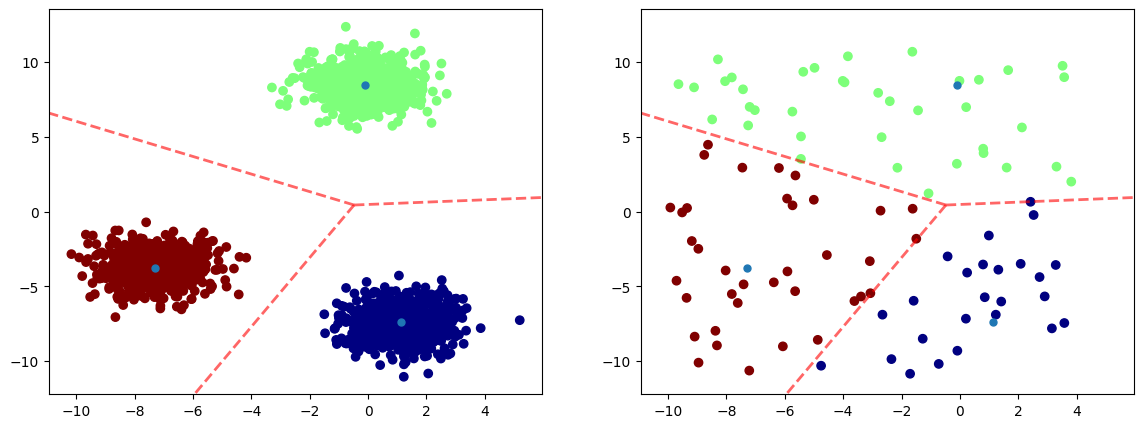

In [ ]:
# Select dim points randomly
n = 100
dim = 1
np.random.seed(42)

x = np.array([])
x = np.append(x,np.random.rand(n, dim)*14-10)
x = np.append(x,np.random.rand(n, dim)*22-11)
X_new = np.reshape(x,(2,n)).transpose()

# Best model
nb_c = 3

y_p_new = models[nb_c-1].predict(X_new)
centers = models[nb_c-1].cluster_centers_

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

vor = Voronoi(centers)

ax1.scatter(X[:,0],X[:,1], c = y_p[nb_c])
voronoi_plot_2d(vor
                 , ax1
                 , show_vertices=False
                 , line_colors='red'
                 , line_width=2
                 , line_alpha=0.6
                 , point_size=10)

ax2.scatter(X_new[:,0],X_new[:,1], c = y_p_new)
voronoi_plot_2d(vor
                 , ax2
                 , show_vertices=False
                 , line_colors='red'
                 , line_width=2
                 , line_alpha=0.6
                 , point_size=10)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
plt.show()

#### Practice this on more tricky example

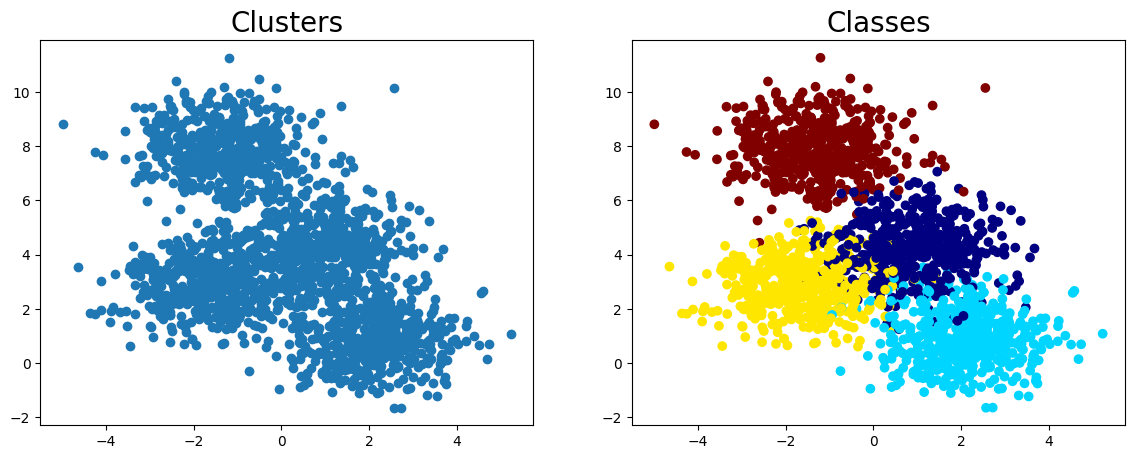

In [ ]:
n_samples = 2000
random_state = 0 # fix the random state for reproducibility
n_components = 4
std_dev=1
# This function makes some clusters with 2D coordinates in X and a label y
# Usefull for testing unsupervised ML as well classification

X,y = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=std_dev, random_state=random_state)

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1])
ax1.set_title ('Clusters',fontsize=20)
ax2.scatter(X[:,0], X[:,1], c = y)
ax2.set_title ('Classes',fontsize=20)
xlim, ylim = ax1.get_xlim(),ax1.get_ylim()
plt.show()

In [ ]:
# create a K-means model with that number of clusters

# cluster the data with that model

# As demonstrated above, use the same data for diverent k to see how it performs


In [ ]:
# Extract and plot the inertia


# Extract and plot the silhouette


### Conclusion:

Here k-means still perdorms quite well, even if the inertia and siloutte score are less clear.

Some final remarks about k-means that where not adressed here:

* Advantages: k-Means is fast and scalable

* Drawbacks: The model performance is highly impacted by the initial centroids. Some centroids initiation can produce sub-optimal results. k-Means model does not perform well when the cluster sizes vary a lot, have different densities, or have a non-spherical shape.

* Extentions: k-means++ which contains a more clever way to initialize the centroids, often used in the Gaussian Mixture Model.  



---


## Gaussian Mixture Model

Gaussian Mixture Model (GMM) is a probabilistic model that assumes each data point belongs to a Gaussian distribution. It uses the expectation-maximization (EM) algorithm.

In the expectation step, the algorithm estimates the probability of each data point belonging to each cluster.
In the maximization step, each cluster is updated using the estimated probability of belonging to the cluster of all the data points.
The updates of the cluster are mostly impacted by the data points with high probabilities of belonging to the cluster.

Since we are using the already done `sklearn` Python routines, the code here for GMM is similar to the one for the k-means, we just need to change the method from `KMeans` to `GaussianMixture`.

One difference is that the value for n_init from the default value of $1$ is changed to $5$. n_init is the number of initializations to generate. When setting it to $5$, it means that $5$ initializations for the model will be performed, and the one with the best result is kept.

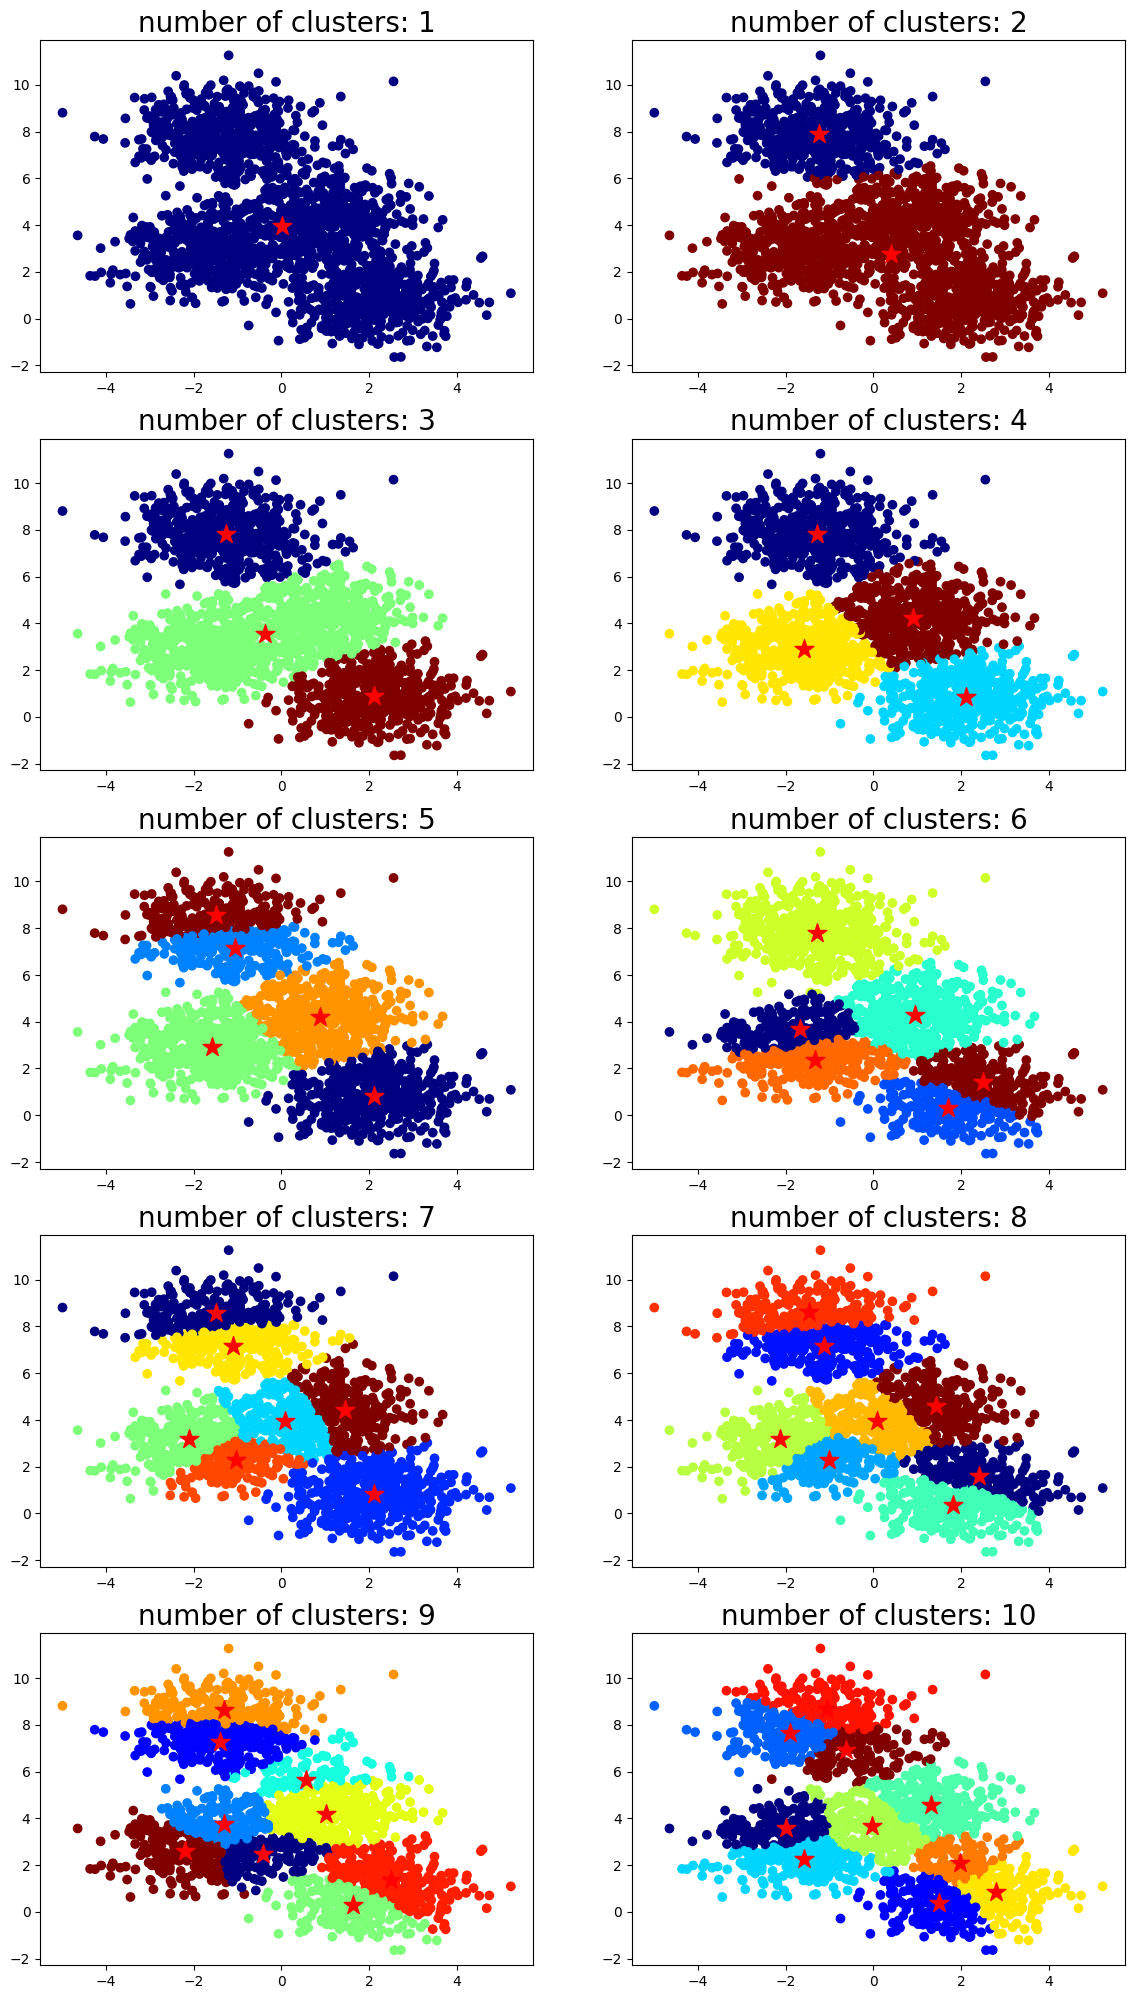

In [ ]:
k_max = 10
nr = k_max//2

models_gmm = []
y_pred = np.zeros(n_samples) #create an empty array

figure, ax = plt.subplots(nrows=nr, ncols = 2, figsize=(14,5*nr))

for nb_c in range(1,k_max+1):

# create a GMM model with that number of clusters
    model = GaussianMixture(n_components=nb_c
                            , n_init= 5
                            , random_state=random_state)

# cluster the data with that model
    model.fit(X)

# here for the demonstration use the same data to see how it performs
    y_pred= np.append(y_pred, model.predict(X))
    models_gmm.append(model)

y_p_gmm  = np.reshape(y_pred,(k_max+1,n_samples))

for nb_c in range(1,k_max+1):
    ax[(nb_c-1)//2,1-nb_c%2].scatter(X[:, 0], X[:,1], c = y_p_gmm[nb_c,:])
    ax[(nb_c-1)//2,1-nb_c%2].set_title(f'number of clusters: {nb_c}', fontsize = 20)
    ax[(nb_c-1)//2,1-nb_c%2].scatter(models_gmm[nb_c-1].means_[:,0], models_gmm[nb_c-1].means_[:,1],
                marker='*',
                color='red',
                s=200);


For n_clusters = 2 The average silhouette_score is : 0.4880975341482814
For n_clusters = 3 The average silhouette_score is : 0.47467026461446765
For n_clusters = 4 The average silhouette_score is : 0.5033836422140959
For n_clusters = 5 The average silhouette_score is : 0.43277526224446417
For n_clusters = 6 The average silhouette_score is : 0.38888034051238013
For n_clusters = 7 The average silhouette_score is : 0.3544433265235274
For n_clusters = 8 The average silhouette_score is : 0.3160762030639514
For n_clusters = 9 The average silhouette_score is : 0.31329832242179473
For n_clusters = 10 The average silhouette_score is : 0.31749575286193477


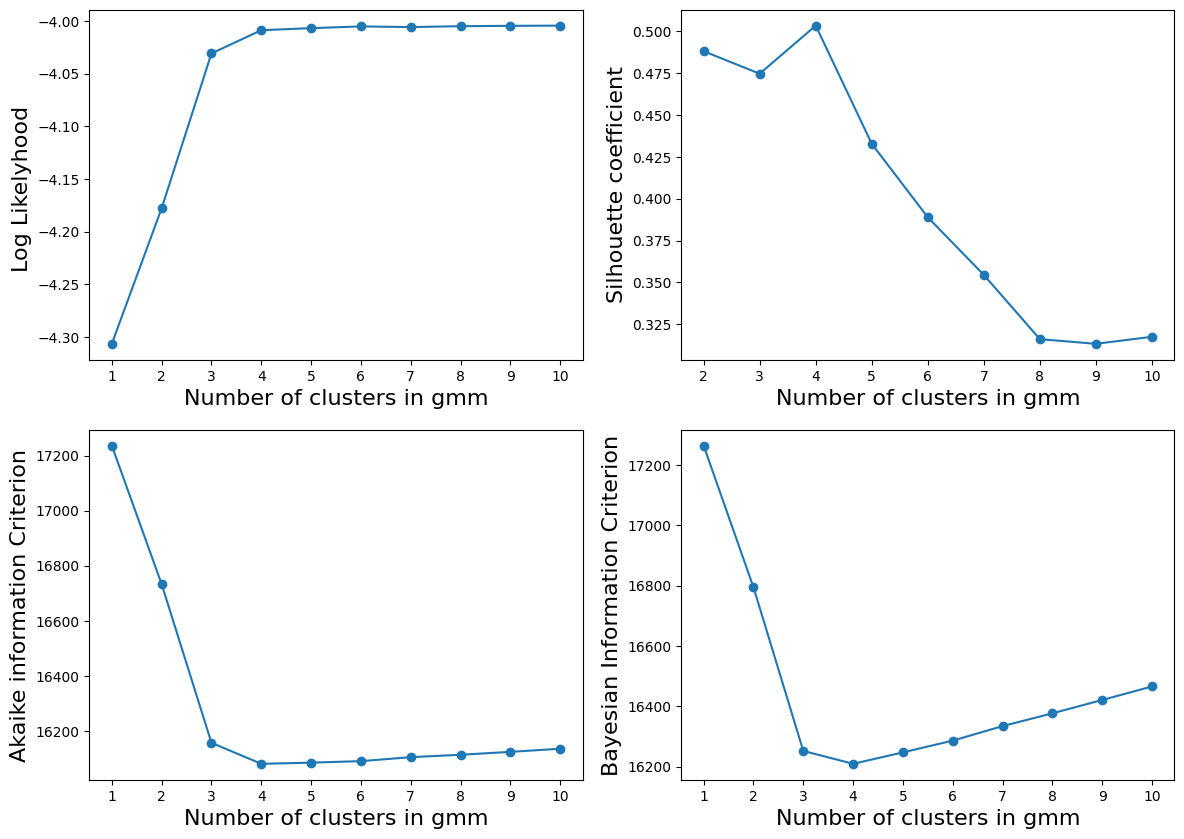

In [ ]:
# Since sklearn do not give a standard inertia output for GMM, here we extract the log-likelyhood, AIC and BIC.
# Check https://scikit-learn.org/stable/modules/linear_model.html#aic-bic for the mathematical definitions and the meaning of each metric.

elb = []
aic = []
bic = []
for i in range(k_max):
    elb.append(models_gmm[i].score(X))
    aic.append(models_gmm[i].aic(X))
    bic.append(models_gmm[i].bic(X))

# Extract the silhouette
sil = []
for i in range(2,k_max+1):
    sil.append(silhouette_score(X, y_p_gmm[i]))

    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        sil[-1],
    )

figure, axs = plt.subplots(nrows = 2, ncols=2, figsize=(14,10))

axs[0,0].plot(range(1,k_max+1),elb, marker = 'o')
axs[0,0].set_xticks(range(1,k_max+1))
axs[0,0].set_xlabel('Number of clusters in gmm', fontsize=16)
axs[0,0].set_ylabel('Log Likelyhood ', fontsize=16)

axs[0,1].plot(range(2,k_max+1),sil, marker = 'o')
axs[0,1].set_xticks(range(2,k_max+1))
axs[0,1].set_xlabel('Number of clusters in gmm', fontsize=16)
axs[0,1].set_ylabel('Silhouette coefficient', fontsize=16)

axs[1,0].plot(range(1,k_max+1),aic, marker = 'o')
axs[1,0].set_xticks(range(1,k_max+1))
axs[1,0].set_xlabel('Number of clusters in gmm', fontsize=16)
axs[1,0].set_ylabel('Akaike information Criterion', fontsize=16)

axs[1,1].plot(range(1,k_max+1),bic, marker = 'o')
axs[1,1].set_xticks(range(1,k_max+1))
axs[1,1].set_xlabel('Number of clusters in gmm', fontsize=16)
axs[1,1].set_ylabel('Bayesian Information Criterion', fontsize=16)

plt.show()



---


## Hierachical clustering

Hierarchical clustering analysis (HCA) is a umbrela term for a family of clustering methods that are used to build a hierarchy of clusters. The hierarchical clustering algorithms produce a binary tree where the root of the tree includes all the data points, and the leaves of the tree are the individual data points. Their are divided in *agglomerative* (bottom-up, i.e., we start with all samples in 1-sampled clusters and merge then to go up in the hyerarchy) and *divisive* (top-down, i.e., all samples start in the same cluster, where splits mean moving down in the hierarchy).

Here we will use the `AgglomerativeClustering` from `sklearn`, that uses the bottom-up approach. Manny strategies can be used to merge the clusters (cansulte the ones available in this function [here](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)), but here we will use the default `Ward` approach, that searchs to minimize variance inside the clusters.

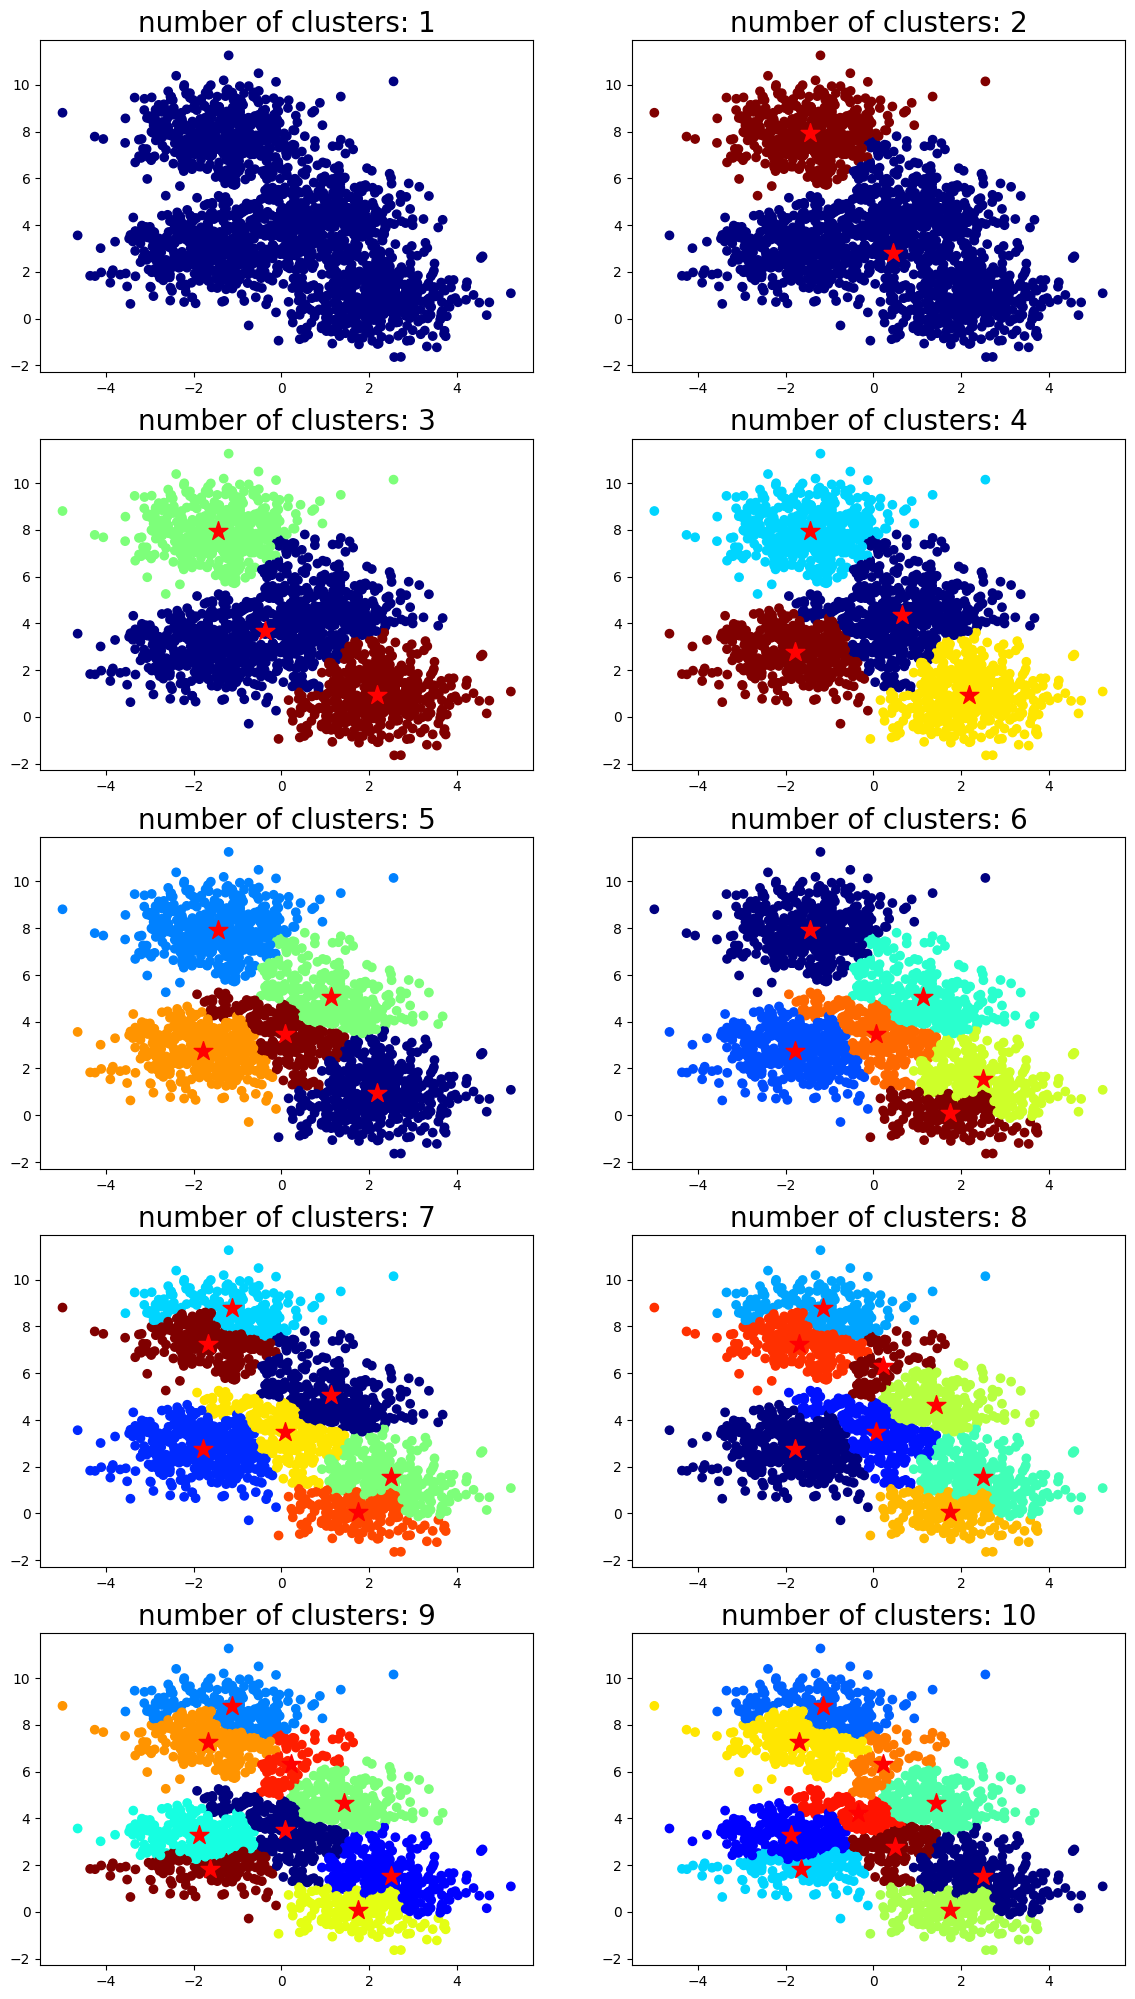

In [ ]:
k_max = 10
nr = k_max//2

models_hc = []
y_pred = np.zeros(n_samples) #create an empty array

figure, ax = plt.subplots(nrows=nr, ncols = 2, figsize=(14,5*nr))

for nb_c in range(1,k_max+1):

# create a GMM model with that number of clusters
    model = AgglomerativeClustering(n_clusters=nb_c)

# cluster the data with that model
    model.fit_predict(X)

# here for the demonstration use the same data to see how it performs
    y_pred= np.append(y_pred, model.fit_predict(X))
    models_hc.append(model)

y_p_hc  = np.reshape(y_pred,(k_max+1,n_samples))


# for this method calculate the centroids externally
clf = NearestCentroid()

for nb_c in range(1,k_max+1):
    ax[(nb_c-1)//2,1-nb_c%2].scatter(X[:, 0], X[:,1], c = y_p_hc[nb_c,:])
    ax[(nb_c-1)//2,1-nb_c%2].set_title(f'number of clusters: {nb_c}', fontsize = 20)
    if nb_c>1:
        clf.fit(X, y_p_hc[nb_c])
        ax[(nb_c-1)//2,1-nb_c%2].scatter(clf.centroids_[:,0], clf.centroids_[:,1],
                marker='*',
                color='red',
                s=200);


For n_clusters = 2 The average silhouette_score is : 0.4732869765948951
For n_clusters = 3 The average silhouette_score is : 0.4516588467461949
For n_clusters = 4 The average silhouette_score is : 0.47300197988110165
For n_clusters = 5 The average silhouette_score is : 0.40562344744763357
For n_clusters = 6 The average silhouette_score is : 0.3562715683706542
For n_clusters = 7 The average silhouette_score is : 0.2990878802077063
For n_clusters = 8 The average silhouette_score is : 0.2995691328582302
For n_clusters = 9 The average silhouette_score is : 0.28648731566707386
For n_clusters = 10 The average silhouette_score is : 0.2803409281925688


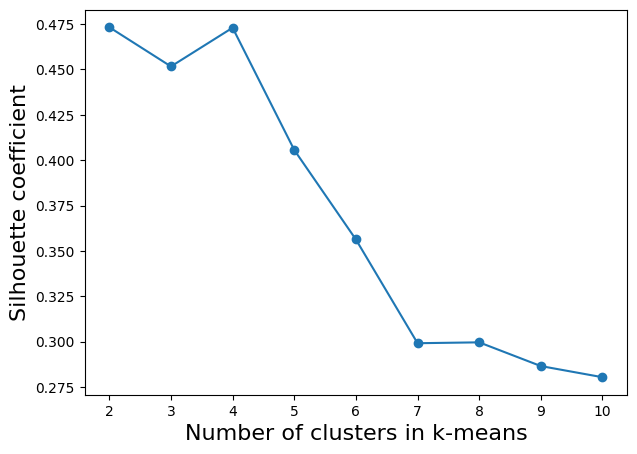

In [ ]:
# Extract the silhouette
sil = []
for i in range(2,k_max+1):
    sil.append(silhouette_score(X, y_p_hc[i]))

    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        sil[-1],
    )

figure, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

ax.plot(range(2,k_max+1),sil, marker = 'o')
ax.set_xticks(range(2,k_max+1))
ax.set_xlabel('Number of clusters in k-means', fontsize=16)
ax.set_ylabel('Silhouette coefficient', fontsize=16)



plt.show()


---

## Density-based spatial clustering of applications with noise  (DBSCAN)




DBSCAN defines clusters using data density. It has two important hyperparameters to tune, `eps` and `min_samples`.

* `eps` is the epsilon distance to be considered as the neighborhood of a data point. It is the most important parameter for DBSCAN.
* `min_samples` is the number of minimum data points in the neighborhood  of a point (including itself) in order for that point to be defined as a *core data point*.

All data points in the neighborhood of the core data points belong to the same cluster, what allows to groupings of core points to be formed in the same cluster. The data points that do not have a core data point in the neighborhood are considered outliers and are marked in the output of this method with the label `-1`.

**An important distinction with respect to the other methods is that DBSCAN does not take a pre-defined number of clusters**, it identifies the number of clusters based on the density distribution of the dataset.

Simple sample: 
Estimated number of clusters: 3
Estimated number of noise points: 15


Tricky sample: 
Estimated number of clusters: 1
Estimated number of noise points: 14


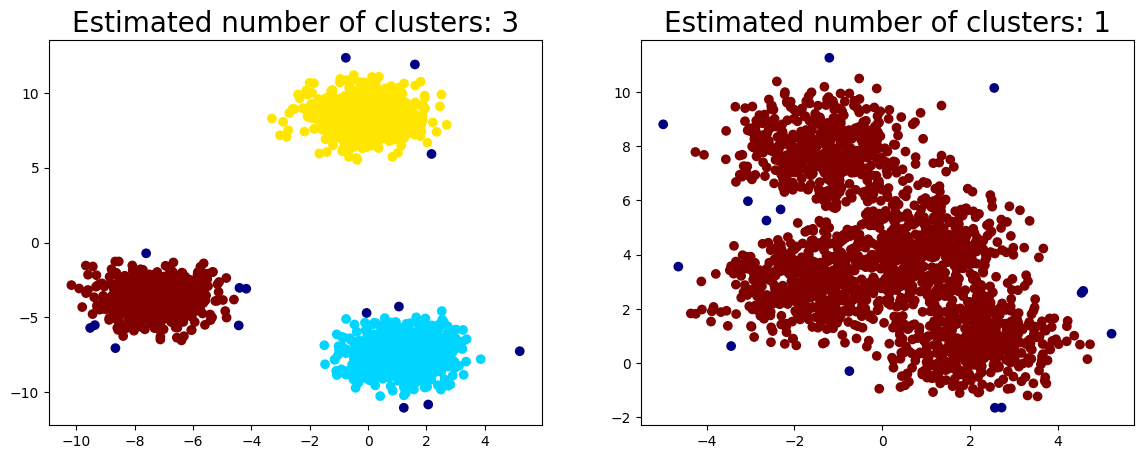

In [ ]:
# First go back to the first sample

X0,y0 = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=130)
model_db0 = DBSCAN(eps = 0.6, min_samples = 3) # <<------------ Try playing with those values and see how it changes the result
y_p_db0= model_db0.fit_predict(X0)


# Then the more tricky sample
model_db = DBSCAN(eps = 0.6, min_samples = 3) # <<------------ Try playing with those values and see how it changes the result

# cluster the data with that model
y_p_db= model_db.fit_predict(X)

print('Simple sample: ')
labels0 = model_db0.labels_
n_clusters0 = len(set(labels0)) - (1 if -1 in labels0 else 0)
n_noise0 = list(labels0).count(-1)
print("Estimated number of clusters: %d" % n_clusters0)
print("Estimated number of noise points: %d" % n_noise0)
print('\n')
print('Tricky sample: ')
labels = model_db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize=(14,5))

ax1.scatter(X0[:, 0], X0[:,1], c = y_p_db0)
ax1.set_title(f'Estimated number of clusters: {n_clusters0}', fontsize = 20)
ax2.scatter(X[:, 0], X[:,1], c = y_p_db)
ax2.set_title(f'Estimated number of clusters: {n_clusters}', fontsize = 20)

plt.show()

For the first simple sample, DBSCAN identifies the correct number of clusters, at the condition that two parameters are correctly set. In that case the tuning is somewhat easy. Here the number of cluster is 4 out of which 1 has a label -1 corresponding to the noise. The latter tha to be reduced but beware this is balance between this noise and the  chosen neighborhood.

For the more tricky sample is seem that DBSCAN has some difficulty at first sight to identify the clusters that overlap, and a more deeper tuning should be done (for instance, try `DBSCAN(eps = 0.4, min_samples = 20)`).  

DBSCAN Pros: works on datasets of any shape (the clusters can be not gaussian, they just need to be connected by core data points) and identifies anomalies automatically. The automatic selection of number of clusters can also be a plus in unknown data.

DBSCAN Cons: It does not work well for identifying the clusters that are not well separated (as almost all clustering methods). Different clusters in the dataset need to have similar densities, otherwise, the DBSCAN does not perform well.




---

#Practical exemple - ...

